## Linear Regression and RANSAC

In [2]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [3]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [4]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [5]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [6]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
lr = linear_model.LinearRegression()
lr.fit(X, y)
line_y = lr.predict(line_X)
print(line_y)

[-174.38323639 -120.21087252  -66.03850865  -11.86614478   42.30621909
   96.47858295  150.65094682  204.82331069]


In [7]:
# LINEAREARTEA

def var(vals, mean, n):
    tot = 0
    for i in range(n):
        tot += (vals[i]-mean)**2
    return tot
    #var = sum([(i-mean)**2 for i in values])

def cov(X, X_mean, y, y_mean, n):
    cov = float()
    for i in range(n):
        cov += (X[i] - X_mean) * (y[i] - y_mean)
    return cov

def fit(X, y):
    n = len(X)
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    X_var = var(X, X_mean, n)
    covariance = cov(X, X_mean, y, y_mean, n)
    m = covariance/X_var
    c = y_mean - m * X_mean
    return (m, c)

def predict(values, model):
    predicted_points = []
    for value in values:
        point = model[0]*value + model[1]
        predicted_points.append(point.item())
    return predicted_points

model = fit(X, y)
my_y = predict(line_X, model)
print(my_y)

[-174.38323639022192, -120.21087252120681, -66.03850865219167, -11.866144783176534, 42.306219085838606, 96.47858295485374, 150.65094682386888, 204.82331069288404]


In [21]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Predict data of estimated models
line_y_ransac = ransac.predict(line_X)
print(line_y_ransac)

# Label the if source data is inlier or outlier
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

[-249.81104528 -167.72571369  -85.64038211   -3.55505052   78.53028107
  160.61561265  242.70094424  324.78627583]


In [40]:
# RANSACSACSACSACSACSACASC

# using 2 points, find line
# calculate amount of inliers with that line
# if more than max, set as new max
# for a number of iterations, get the max one

def find_line(points):
    m = (points[1][1]-points[0][1])/(points[1][0]-points[0][0])
    c = points[1][1]-(m*(points[1][0]))
    return (m, c)

def distance(point, model):
    num = abs(model[0]*point[0] - point[1]+model[1])
    den = np.sqrt(model[0]**2)
    return num/den

def ransac_fit(X, y, iterations, tolerance):
    max_inliers = 0
    best_model = None
    
    for i in range(iterations):
        #choose two points at random
        #find the line
        #find the inliers
        #check if more than max
        #if so, set as new leading model and set max
        #return at end
        idx1 = np.random.randint(len(X))
        idx2 = np.random.randint(len(X))
        cur_points = ((X[idx1], y[idx1]),(X[idx2], y[idx2]))
        cur_model = find_line(cur_points)
        cur_inliers = 0
        for j in range(len(X)):
            cur_point = (X[j], y[j])
            if distance(cur_point, cur_model) < tolerance:
                cur_inliers += 1
        if cur_inliers > max_inliers:
            max_inliers = cur_inliers
            best_model = cur_model
                
    return best_model

def ransac_predict(values, model):
    predicted_points = []
    for value in values:
        point = model[0]*value + model[1]
        predicted_points.append(point.item())
    return predicted_points

def ransac_inliers(X_vals, y_vals, model, tolerance):
    X_size = len(X_vals)
    inliers = np.zeros(X_size, dtype=bool)
    for i in range(X_size):
        cur_point = (X_vals[i], y_vals[i])
        if distance(cur_point, model) < tolerance:
            inliers[i] = True
    return inliers

iterations = 100
tolerance = 0.4 

ransac_model = ransac_fit(X, y, iterations, tolerance)
my_y_ransac = ransac_predict(line_X, ransac_model)
my_inlier_mask = ransac_inliers(X, y, ransac_model, tolerance)
my_outliar_mask = np.logical_not(my_inlier_mask)

print(my_y_ransac)

[-253.18472421781155, -169.8724805462452, -86.5602368746789, -3.2479932031125807, 80.06425046845374, 163.37649414002007, 246.68873781158638, 330.0009814831527]


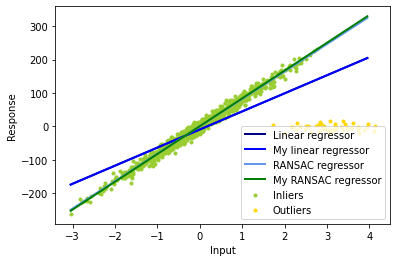

In [41]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
    plt.plot(line_X, my_y, color='blue', linewidth=lw, label='My linear regressor')

if (doing_ransac):
    plt.scatter(X[my_inlier_mask], y[my_inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[my_outliar_mask], y[my_outliar_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
    plt.plot(line_X, my_y_ransac, color='green', linewidth=lw, label='My RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()